In [ ]:
?system
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.2                         
year           2023                        
month          10                          
day            31                          
svn rev        85441                       
language       R                           
version.string R version 4.3.2 (2023-10-31)
nickname       Eye Holes                   

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘Rcpp’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'bit', 'brio', 'bslib', 'cpp11', 'curl', 'data.table', 'desc',
  'devtools', 'fansi', 'gargle', 'gert', 'haven', 'highr', 'isoband',
  'jsonlite', 'openssl', 'pkgbuild', 'processx', 'progress', 'ragg',
  'roxygen2', 'sass', 'scales', 'svglite', 'testthat', 'texts

**Read Ht-seq count results**

In [ ]:
countData <- read.csv('/all_outputs_htseq.csv', header = FALSE, sep = "\t")
colnames(countData) <- c("Gene_ID","ERR188071_rv.bam","ERR188444_s3.bam","ERR188071_s1.bam","ERR188071_s2.bam")
head(countData)

,Gene_ID,ERR188071_rv.bam,ERR188444_s3.bam,ERR188071_s1.bam,ERR188071_s2.bam
,<chr>,<int>,<int>,<int>,<int>
1,ENSG00000000003,0,1,4,4
2,ENSG00000000005,0,0,0,0
3,ENSG00000000419,909,800,917,917
4,ENSG00000000457,535,564,560,563
5,ENSG00000000460,646,643,676,675
6,ENSG00000000938,2975,2306,2392,2389


**Read Metadata**

In [ ]:
metaData <- read.csv('/example_metadatap.csv', header = TRUE, sep = ",")
metaData

sample_name,status,celltype,geo_id
<chr>,<chr>,<chr>,<chr>
ERR188071_rv.bam,control,N61311,GSM1275862
ERR188444_s3.bam,control,N61312,GSM1275863
ERR188071_s1.bam,treated,N61315,GSM1275866
ERR188071_s2.bam,treated,N61316,GSM1275867


In [ ]:

library( "DESeq2" )

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [ ]:
dds <- DESeqDataSetFromMatrix(countData=countData,
                              colData=metaData,
                              design=~status, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
dds

class: DESeqDataSet 
dim: 61557 4 
metadata(1): version
assays(1): counts
rownames(61557): ENSG00000000003 ENSG00000000005 ... __not_aligned
  __alignment_not_unique
rowData names(0):
colnames(4): ERR188071_rv.bam ERR188444_s3.bam ERR188071_s1.bam
  ERR188071_s2.bam
colData names(4): sample_name status celltype geo_id

In [ ]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
res <- results(dds, tidy=TRUE)
head(res)

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,2.322204,3.02891209,2.8364200,1.0678644,0.2855817,0.9980175
2,ENSG00000000005,0.000000,NA,NA,NA,NA,NA
3,ENSG00000000419,881.489709,0.19840705,0.1748618,1.1346505,0.2565218,0.9980175
4,ENSG00000000457,554.967216,0.11446655,0.2404468,0.4760578,0.6340332,0.9980175
5,ENSG00000000460,658.637347,0.15531944,0.2158173,0.7196801,0.4717220,0.9980175
6,ENSG00000000938,2487.656080,-0.03772277,0.1317656,-0.2862869,0.7746584,0.9980175


In [ ]:
# SmallestPvalue
idx <- which.min(res$pvalue)
counts(dds)[idx, ]

ERR188071_rv.bam ERR188444_s3.bam ERR188071_s1.bam ERR188071_s2.bam 
             328              267               21               21

In [ ]:
#Normalization
counts(dds, normalized=TRUE)[ idx, ]

ERR188071_rv.bam ERR188444_s3.bam ERR188071_s1.bam ERR188071_s2.bam 
       283.10759        286.25495         21.56721         21.57046

In [ ]:
summary(res)

     row               baseMean        log2FoldChange        lfcSE      
 Length:61557       Min.   :       0   Min.   :-30.000   Min.   :0.104  
 Class :character   1st Qu.:       0   1st Qu.: -0.549   1st Qu.:0.270  
 Mode  :character   Median :       0   Median : -0.027   Median :1.041  
                    Mean   :     672   Mean   : -0.114   Mean   :1.826  
                    3rd Qu.:      17   3rd Qu.:  0.388   3rd Qu.:3.230  
                    Max.   :17767390   Max.   :  6.238   Max.   :4.997  
                                       NA's   :31416     NA's   :31416  
      stat            pvalue           padj      
 Min.   :-9.266   Min.   :0.000   Min.   :0.000  
 1st Qu.:-0.505   1st Qu.:0.417   1st Qu.:0.998  
 Median :-0.065   Median :0.608   Median :0.998  
 Mean   :-0.056   Mean   :0.587   Mean   :0.997  
 3rd Qu.: 0.519   3rd Qu.:0.785   3rd Qu.:0.998  
 Max.   : 5.144   Max.   :1.000   Max.   :1.000  
 NA's   :31416    NA's   :31416   NA's   :31416  

Please write the best command in the code box based on each question:

The sum of P-Value between 0.01 and 0.001

In [ ]:
sum(res$pvalue < 0.01 & res$pvalue >= 0.001, na.rm = TRUE)

[1] 72

The sum of Log Fold greater than 0 and less than 0.001

In [ ]:
sum(res$pvalue < 0.01 & abs(res$log2FoldChange) > 0 & abs(res$log2FoldChange) < 0.001, na.rm=TRUE)

[1] 0

In [ ]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 30141 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 2, 0.0066%
LFC < 0 (down)     : 18, 0.06%
outliers [1]       : 0, 0%
low counts [2]     : 9374, 31%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



The sum of padj less than 0.5

In [ ]:
sum(res$padj < 0.5, na.rm = TRUE)

[1] 23

In [ ]:
res05 <- results(dds, alpha=0.01)
summary(res05)


out of 30141 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 2, 0.0066%
LFC < 0 (down)     : 16, 0.053%
outliers [1]       : 0, 0%
low counts [2]     : 4936, 16%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



**Please order "res" results based on P-Value:**

In [ ]:
res <- res[order(res$pvalue),]
head(res, n=7)

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54962,ENSG00000278857,153.12505,-3.722274,0.4017178,-9.265891,1.934553e-20,5.830935e-16
53903,ENSG00000276775,198.56721,-3.887152,0.5436785,-7.149725,8.695173e-13,1.310406e-08
21678,ENSG00000211892,1207.71534,-1.936445,0.2730226,-7.092617,1.315995e-12,1.322180e-08
61555,__too_low_aQual,116384.61456,-30.000000,4.7847464,-6.269925,3.612226e-10,2.721903e-06
21732,ENSG00000211970,127.51306,-3.397367,0.5467122,-6.214179,5.159375e-10,3.110174e-06
21676,ENSG00000211890,856.35172,-1.260047,0.2149570,-5.861858,4.577174e-09,2.299343e-05
54921,ENSG00000278771,54.39811,-9.170824,1.5809648,-5.800776,6.600858e-09,2.842235e-05


**Create this plot:**

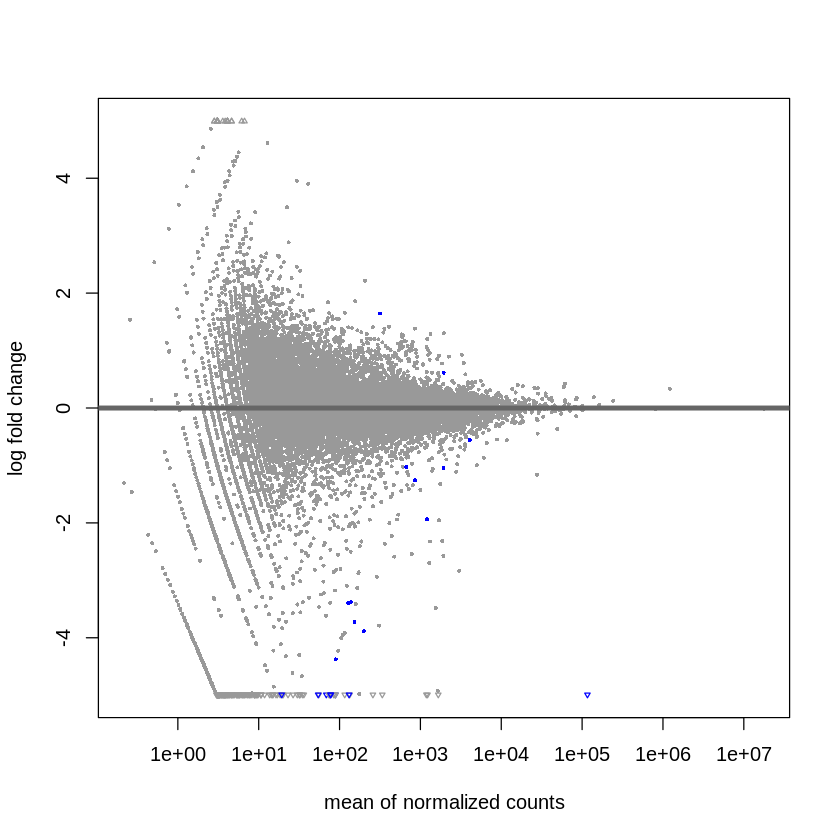

In [ ]:
plotMA(dds)

**Create this plot:**

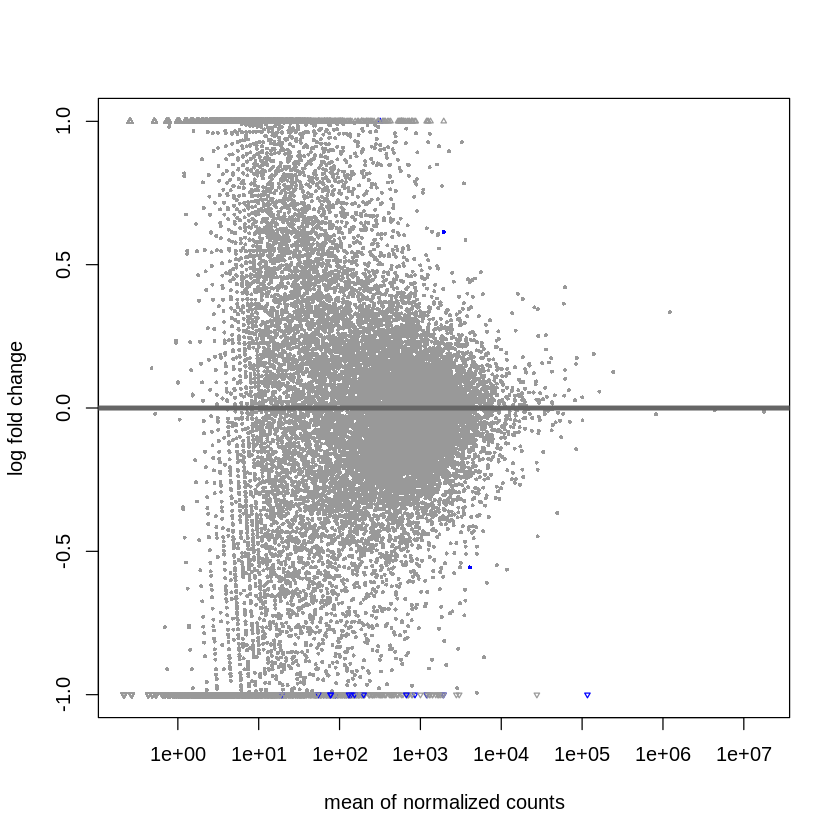

In [ ]:
plotMA(dds, ylim = c(-1,1))

**Create this plot:**

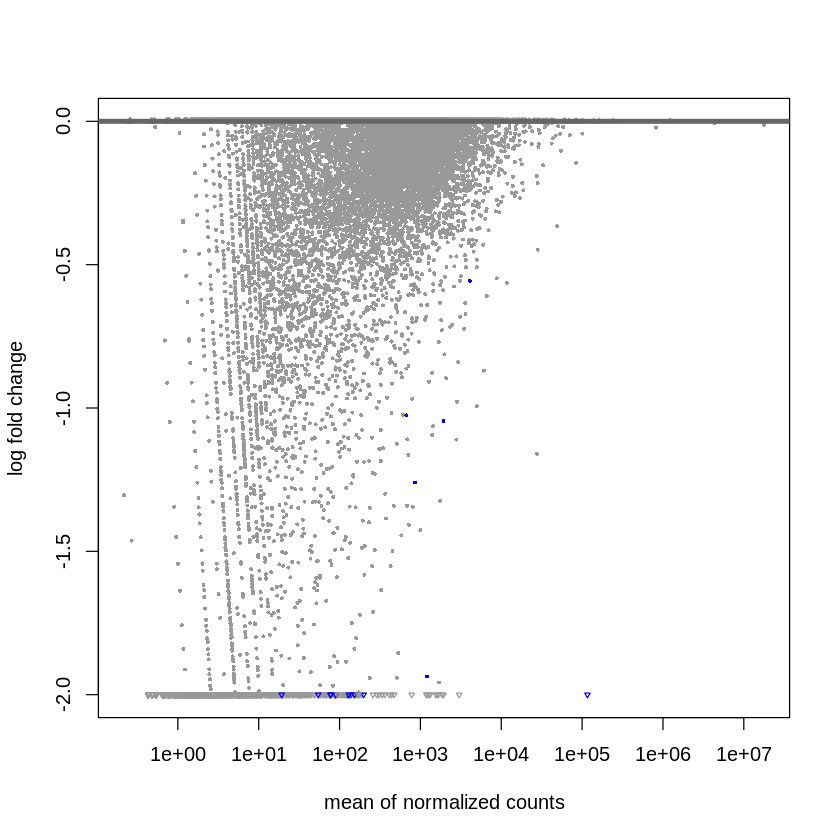

In [ ]:
plotMA(dds, ylim=c(-2,0))

In [ ]:
resNorm <- lfcShrink(dds, coef=2, type="normal")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



Create MA plot based on normalized data

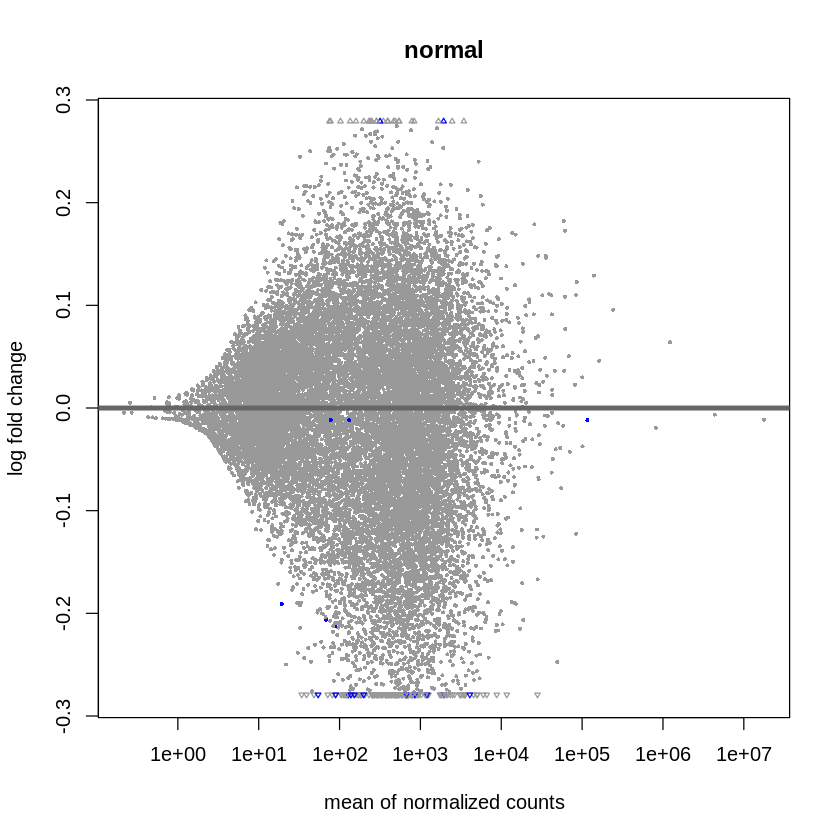

In [ ]:
plotMA(resNorm, main="normal")

Creat this plots (based on top 6 gene_ID of P-Value):

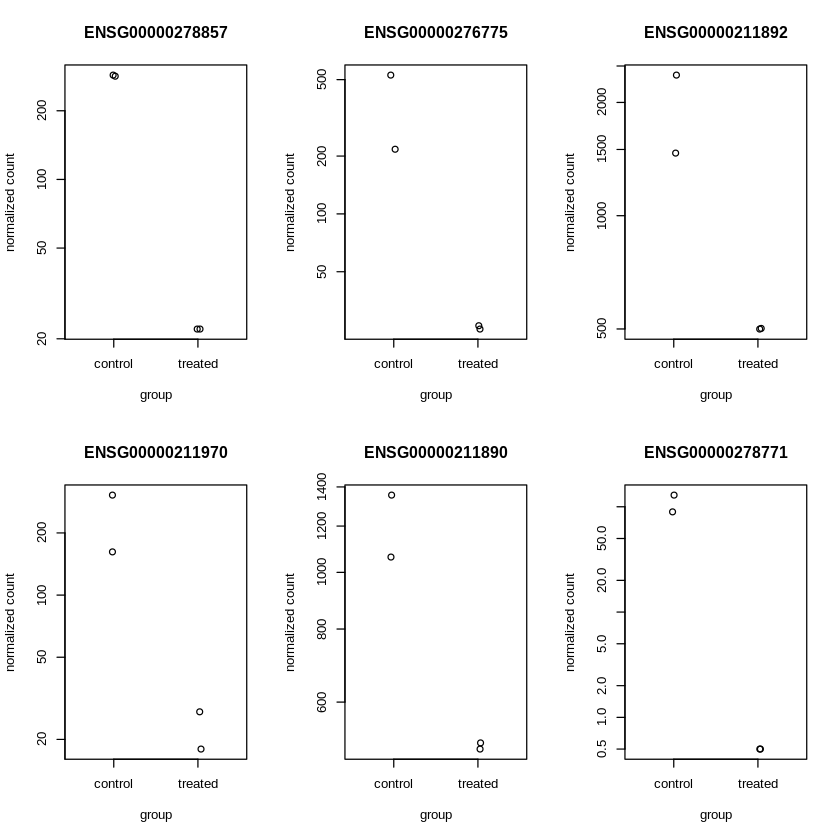

In [ ]:
#we can use plotCounts to compare the normalized counts
#between treated and control groups for our top 4 genes

par(mfrow=c(2,3))

plotCounts(dds, gene="ENSG00000278857", intgroup="status")
plotCounts(dds, gene="ENSG00000276775", intgroup="status")
plotCounts(dds, gene="ENSG00000211892", intgroup="status")
plotCounts(dds, gene="ENSG00000211970", intgroup="status")
plotCounts(dds, gene="ENSG00000211890", intgroup="status")
plotCounts(dds, gene="ENSG00000278771", intgroup="status")

**Create Volcame plot**

In [ ]:
library(repr)
options(repr.plot.width=10, repr.plot.height=7)

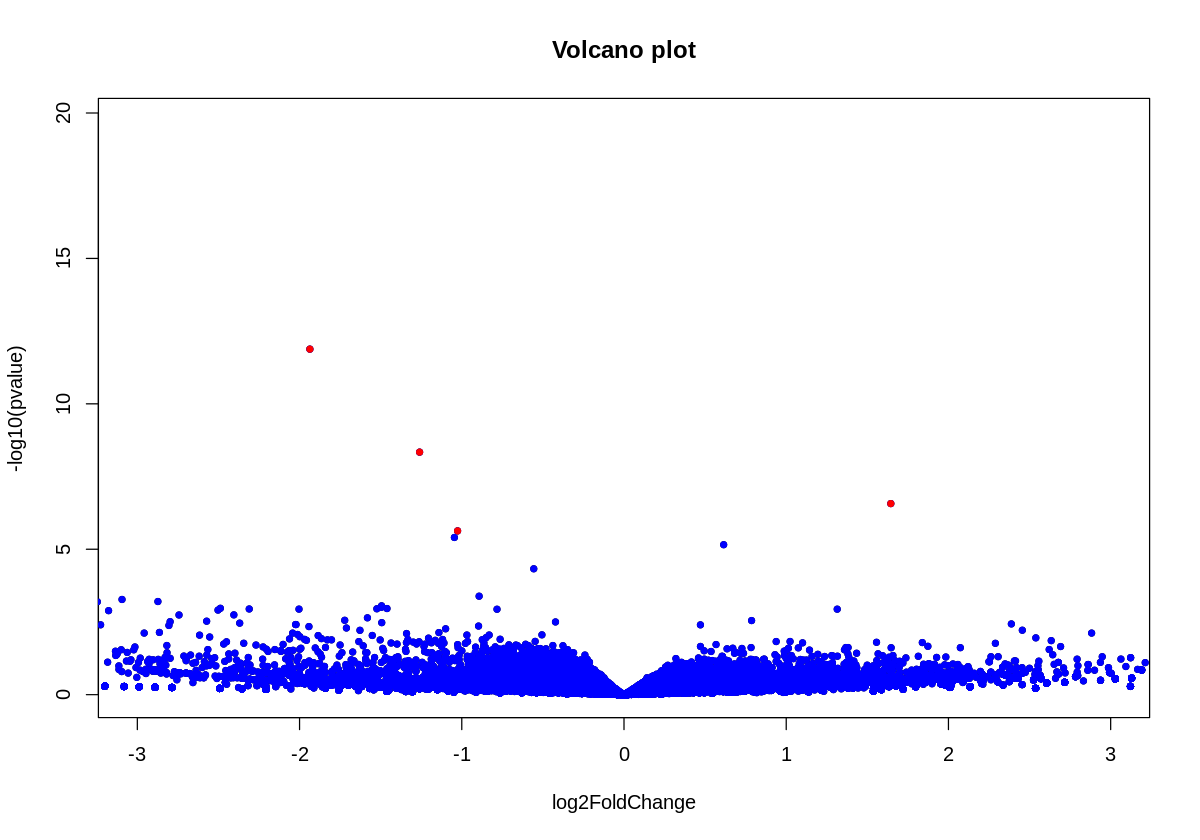

In [ ]:
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue),pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res,padj<1), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res,padj<.007 & abs(log2FoldChange)>-2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))



**Create a PCA plot**

In [ ]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation

vsdata <- vst(dds, blind=FALSE)

using ntop=500 top features by variance



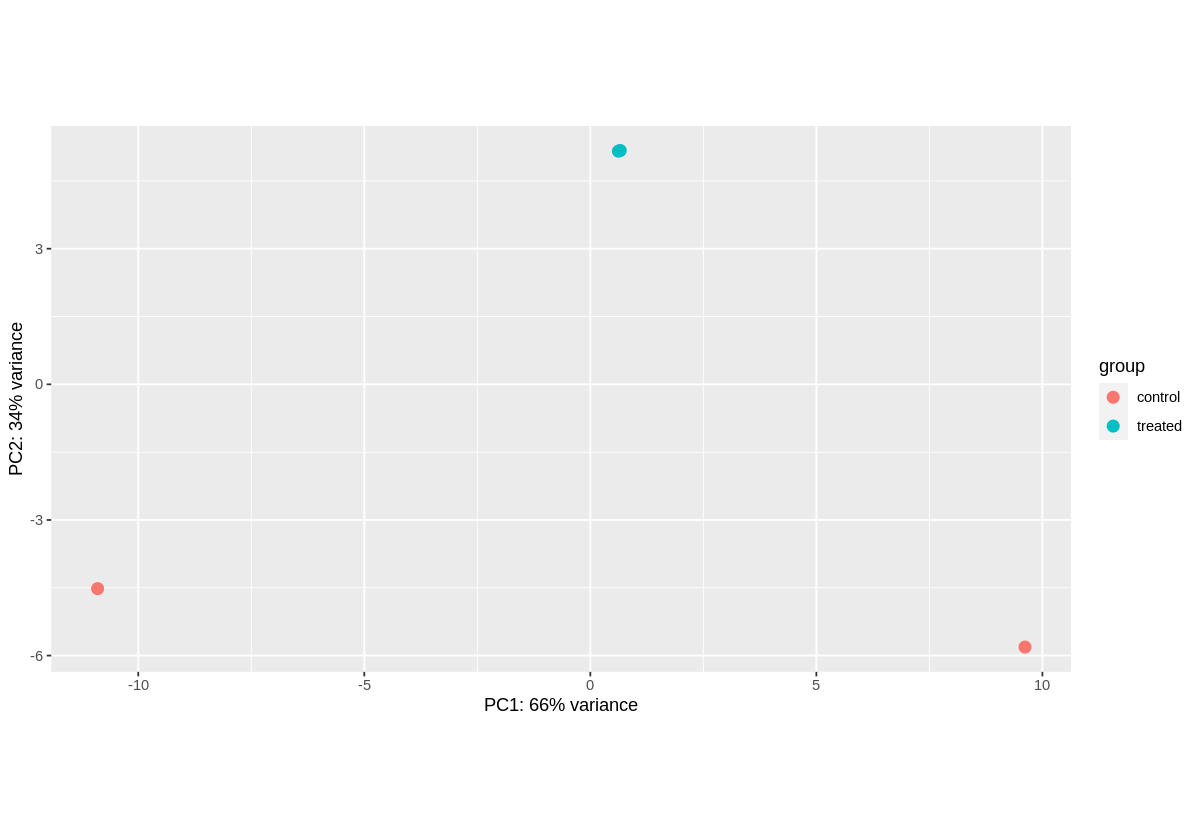

In [ ]:

#using the DESEQ2 plotPCA fxn we can look at how our samples group by treatment
plotPCA(vsdata, intgroup="status")


**Create a DispEsts plot**

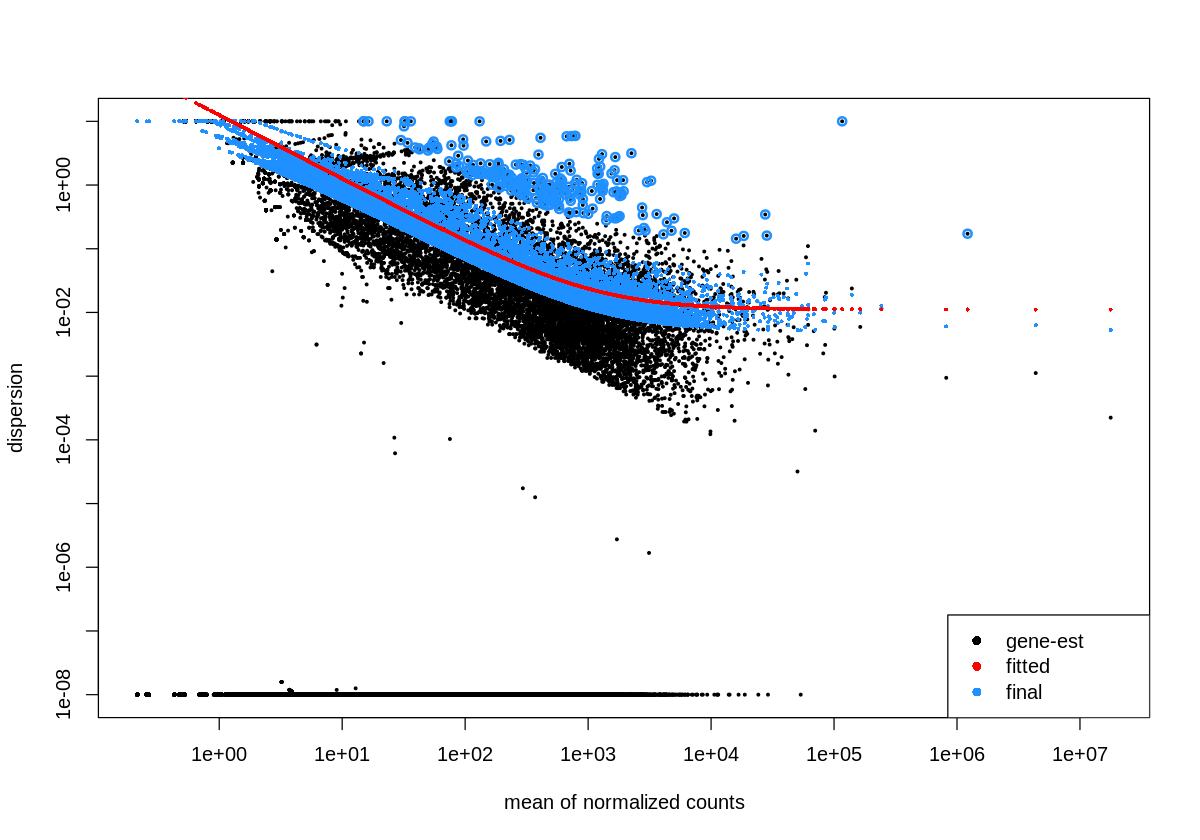

In [ ]:
plotDispEsts(dds)

**Create a Hist plot based on P-Value**


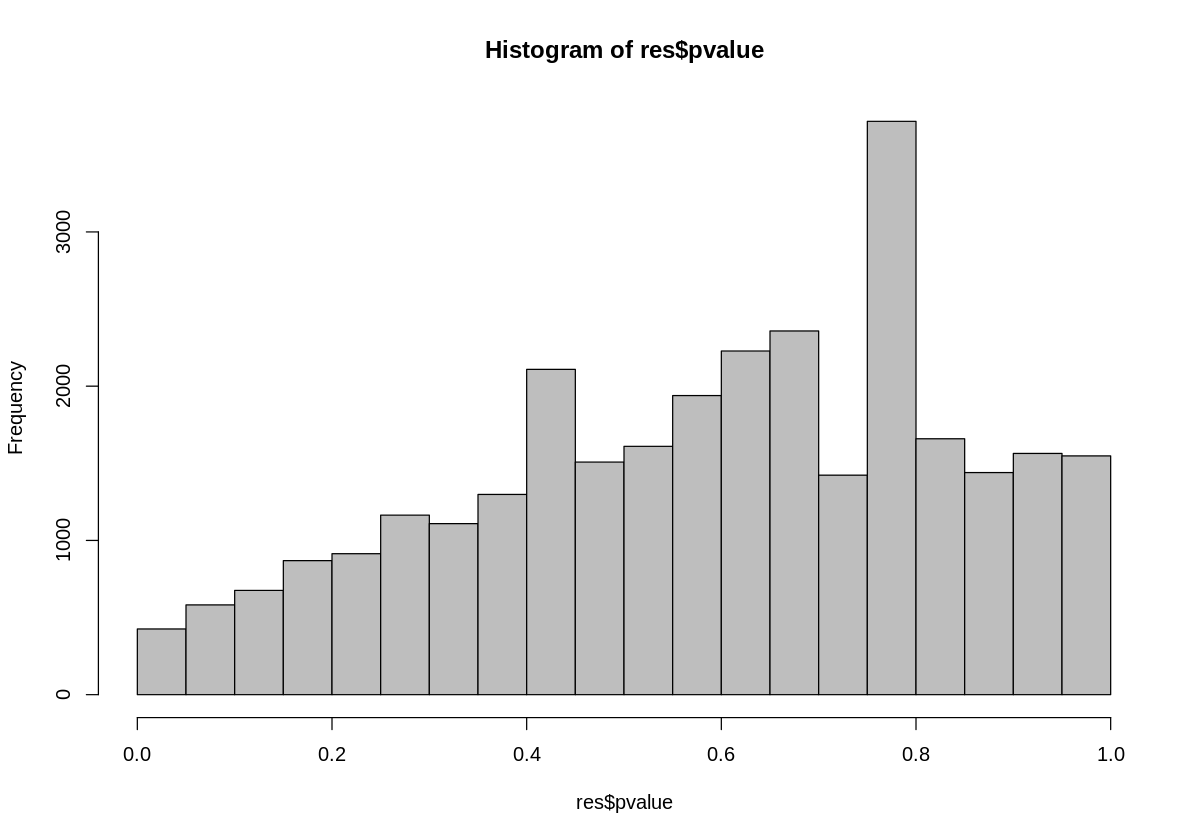

In [ ]:
hist(res$pvalue, breaks=20, col="grey")

**Create a Hist plot based on padj**

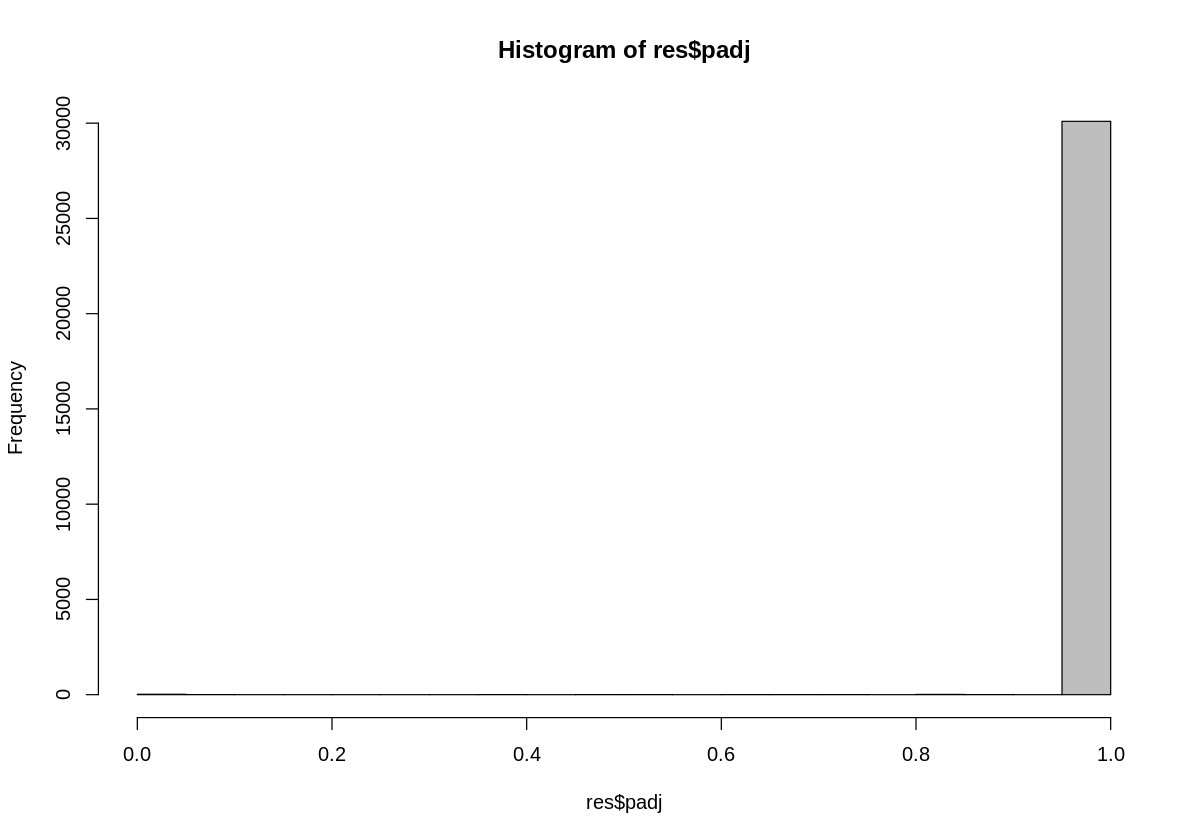

In [ ]:
hist(res$padj, breaks=20, col="grey")

**Create a Hist plot based on P-Value and mean normalized count**

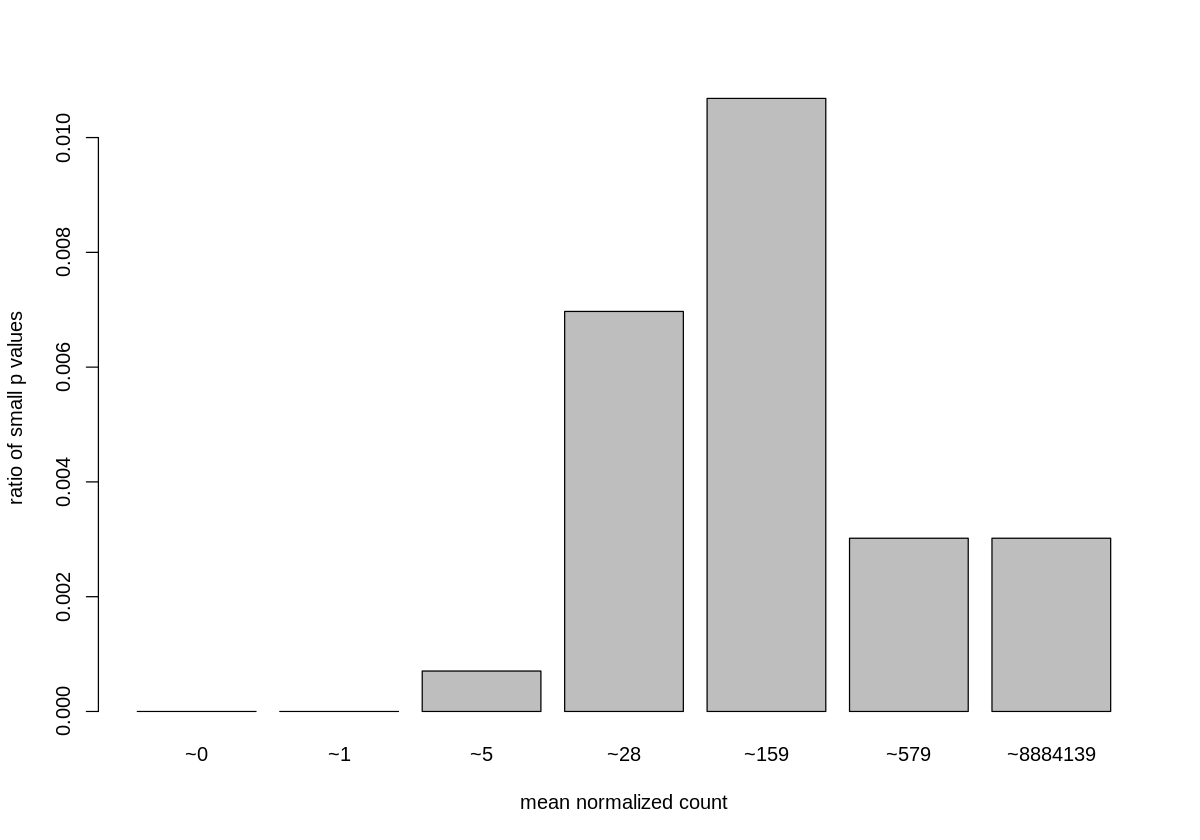

In [ ]:
# create bins using the quantile function
qs <- c(0, quantile(res$baseMean[res$baseMean > 0],0:7/7))
# "cut" the genes into the bins
bins <- cut(res$baseMean, qs)
# rename the levels of the bins using the middle point
levels(bins) <- paste0("~",round(0.5*qs[-1]+0.5*qs[-length(qs)]))
# calculate the ratio of p values less than .01 for each bin
ratios <- tapply( res$pvalue, bins, function(p) mean(p<0.01, na.rm=TRUE))
# plot these ratios
barplot(ratios, xlab="mean normalized count", ylab="ratio of small p values")
